In [5]:
import numpy as np
import scipy.stats as stats
import seaborn as sns #interface to matplotlib, use seaborn when you can
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
# % something is commands that integrate with the jupyter notebook. --- jnb only.


In [14]:
# create the experimental control groups:

# experimental: 20 got better, 30 did not -- binary (yes or no)
# concentate - because the default addition commands assumes a vector operation
experimental = np.concatenate([np.ones(20),np.zeros(30)])
print experimental

# control group: 5 got better 45 did not
control = np.concatenate([np.ones(5),np.zeros(45)])

print 'experimental mean rate:', np.mean(experimental)
print 'control mean rate:', np.mean(control)
print 'difference in mean rates: ', np.mean(experimental) - np.mean(control)

# the hypothesis is that the mean rate difference is zero 
#H0: true difference in mean reates == 0
#H1: difference is not 0
#p(measured difference in rates data | H0 is true)


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
experimental mean rate: 0.4
control mean rate: 0.1
difference in mean rates:  0.3


In [ ]:
# how to find the probability
# t-statistic  to find the P value
# t distribution is very similar to normal distribution, but designed for smaller sample sizes
# otherwise very similar
# what a t stat is ? - 

# variance is the dispersion of all the data
# higher variance, harder to state the certainty of a belief. (variance per sample)
# squared root - standard deviation (merging the variance between teh control and experiments)
# dividing mean difference by a std deviation
# t = 0, you measured the null hypothesis
# t >> 0, the further you are from the null hypothesis
# total 100 samples vs. Z statsx

In [30]:
experimental_var = np.var(experimental)
control_var = np.var(control)

print experimental_var
print control_var
denominator = np.sqrt((experimental_var/len(experimental) + control_var/len(control)))
print denominator

# fewer the people, the lower teh score
t = (np.mean(experimental)-np.mean(control)) / denominator
print t

#denominator = np.sqrt((experimental_var/4 + control_var/4))
#print denominator
#t = (np.mean(experimental)-np.mean(control)) / denominator
#print t

0.24
0.09
0.0812403840464
3.69274472938


In [31]:
# show the distribution of T values
# central theorem - more and more means we measure, they will fall onto a gaussian distribution
xpoints = np.linspace(-4,4,500) # go from -4 to 4 and have 500 evenly spaced points between

#stats t.pdf() - stands for probability density function
# takes x axis points , degrees of freedom, mean of distribution, std deviation of dist
# 
ypoints = stats.t.pdf(xpoints,50,0,1) # 0 is the most likely true value. 

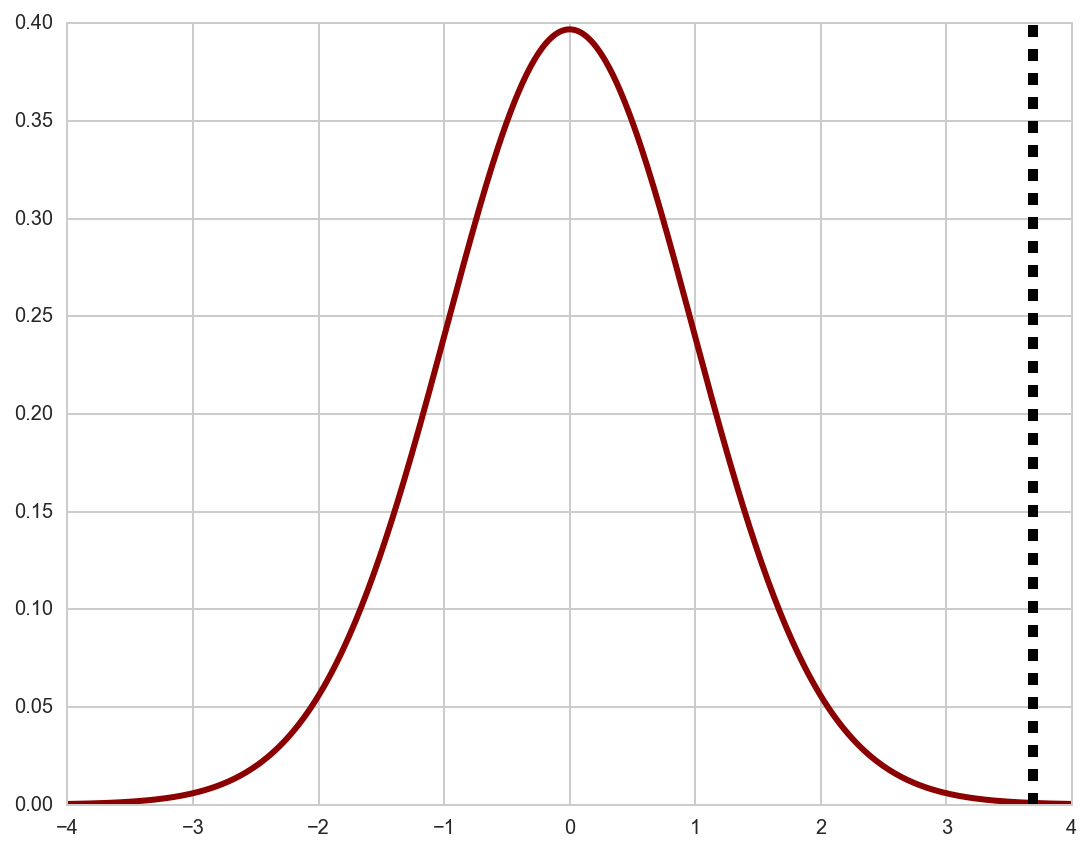

In [32]:
# fig size in "inches" 
fig = plt.figure(figsize = (9,7))
# fig is a posterboard that we attach items too
# declaring the overall container
# axis, can position them in rows and columns, referenced by indices
# figure is hte outermost board

#get current axis (gca) initializes the axis.
ax = fig.gca()

#matplotlib "plot" - plots lines defined by x and y points. fits line through
ax.plot(xpoints,ypoints, linewidth=3, color='darkred')

#plot a vertical line
ax.axvline(t,color='black',linestyle='dashed', linewidth =5)

In [ ]:
#this is a plot of the differences for samples

# we ahve a big difference in means. 

# were the null hypothesis to be true, whats the probability of our current dataset?
# in this case its t >> 0, then small probability that we got this by chance.

# so we reject this null hypothesis.
# P = 0.11 is  the chance that there was random sampling, basically saying it is super small